In [80]:
DF_PATH = 'C:/Users/M/Documents/data_science_project/data/processed/1_preprocessed_df.pkl'
EXPORT_FEATURES_DIR = 'C:/Users/M/Documents/data_science_project/data/processed'
TECH_COLS = ['LanguageWorkedWith',    'DatabaseWorkedWith',    'WebframeWorkedWith',    'MiscTechWorkedWith']
ROL_COLS = ['DevType']
TECH_NEXT_COLS = ['LanguageDesireNextYear','DatabaseDesireNextYear','WebframeDesireNextYear','MiscTechDesireNextYear',]

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import os
import yaml

import plotly 
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE

from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import silhouette_score

pd.options.display.max_rows = 1000

In [3]:
df = pd.read_pickle(DF_PATH)
df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13.0,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",[ASP.NET Core],"[ASP.NET, ASP.NET Core]",Just as welcome now as I felt last year,50.0,36.0,27.0
1,2,I am a developer by profession,No,NaN,19.0,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",[],[],Somewhat more welcome now than last year,NaN,7.0,4.0
2,3,I code primarily as a hobby,Yes,NaN,15.0,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,[],[],Somewhat more welcome now than last year,NaN,4.0,NaN
3,4,I am a developer by profession,Yes,25.0,18.0,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",[],[],Somewhat less welcome now than last year,40.0,7.0,4.0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16.0,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...","[Django, Ruby on Rails]",[Ruby on Rails],Just as welcome now as I felt last year,NaN,15.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16.0,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",[],[],NaN,NaN,10.0,0.0
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,"[Angular, Angular.js, React.js]",[],NaN,NaN,NaN,NaN


# creating one-hot encoded dataframe for each skill

In [5]:
encoded_dfs = {}
for col in (TECH_COLS + ROL_COLS) :
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]) ,columns = binarizer.classes_ ,index = df[col].index)
    encoded_dfs[col] = encoded_df
ohe_df = pd.concat(encoded_dfs ,axis = 1)    


In [6]:
ohe_df

LanguageWorkedWith                                                   \
                Assembly Bash/Shell/PowerShell  C C# C++ Dart Go HTML/CSS   
0                      0                     0  0  1   0    0  0        1   
1                      0                     0  0  0   0    0  0        0   
2                      0                     0  0  0   0    0  0        0   
3                      0                     0  0  0   0    0  0        0   
4                      0                     0  0  0   0    0  0        1   
...                  ...                   ... .. ..  ..  ... ..      ...   
64456                  0                     0  0  0   0    0  0        0   
64457                  1                     1  1  1   1    1  1        1   
64458                  0                     0  0  0   0    0  0        0   
64459                  0                     0  0  0   0    0  0        1   
64460                  0                     0  0  1   0    0  0        1   

                    ...           DevType                          \
      Haskell Java  ... Developer, mobile Educator Engineer, data   
0           0    0  ...                 0        0              0   
1           0    0  ...                 1        0              0   
2           0    0  ...                 0        0              0   
3           0    0  ...                 0        0              0   
4           0    0  ...                 0        0              0   
...       ...  ...  ...               ...      ...            ...   
64456       0    0  ...                 0        0              0   
64457       1    1  ...                 0        0              0   
64458       0    0  ...                 0        0              0   
64459       0    0  ...                 0        0              0   
64460       0    1  ...                 0        0              0   

                                                      \
      Engineer, site reliability Engineering manager   
0                              0                   0   
1                              0                   0   
2                              0                   0   
3                              0                   0   
4                              0                   0   
...                          ...                 ...   
64456                          0                   0   
64457                          0                   0   
64458                          0                   0   
64459                          0                   0   
64460                          0                   0   

                                                                 \
      Marketing or sales professional Product manager Scientist   
0                                   0               0         0   
1                                   0               0         0   
2                                   0               0         0   
3                                   0               0         0   
4                                   0               0         0   
...                               ...             ...       ...   
64456                               0               0         0   
64457                               0               0         0   
64458                               0               0         0   
64459                               0               0         0   
64460                               0               0         0   

                                                
      Senior executive/VP System administrator  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  
...                   ...                  ...  
64456                   1                    0  
64457                   0                    0  
64458          

# dimensionality reduction

In [8]:
skills_ohe = ohe_df.drop('DevType' , axis = 1).copy()
std_skills = StandardScaler().fit_transform(skills_ohe)

In [12]:
std_skills

array([[-0.24152408, -0.64600087, -0.49015788, ..., -0.27109262,
        -0.14436385, -0.19481393],
       [-0.24152408, -0.64600087, -0.49015788, ..., -0.27109262,
        -0.14436385, -0.19481393],
       [-0.24152408, -0.64600087, -0.49015788, ..., -0.27109262,
        -0.14436385, -0.19481393],
       ...,
       [-0.24152408, -0.64600087, -0.49015788, ..., -0.27109262,
        -0.14436385, -0.19481393],
       [-0.24152408, -0.64600087, -0.49015788, ..., -0.27109262,
        -0.14436385, -0.19481393],
       [-0.24152408, -0.64600087, -0.49015788, ..., -0.27109262,
        -0.14436385, -0.19481393]])

# Using TSNE to reduce the dimensions into only two dimensions to be able to visualize the clusters realted to each group of skills .

In [14]:
tsne_projection = TSNE(n_components=2 ,
                       n_jobs = 2 ,
                       method = 'barnes_hut' ,
                       n_iter = 10**4 ,
                       random_state = 0 ,
                       init = 'pca' ,
                       learning_rate = 1 ,
                       perplexity = 2.5).fit_transform(std_skills.T)
tsne_projection = pd.DataFrame(tsne_projection ,index = skills_ohe.columns)

In [15]:
tsne_projection.shape

(74, 2)

In [19]:
tsne_projection.droplevel(0)

,0,1
Assembly,-7.812083,-65.187965
Bash/Shell/PowerShell,-68.457191,-46.878925
C,-3.294933,-65.579109
C#,139.606354,-72.178185
C++,-0.100805,-66.246559
Dart,47.668167,13.711569
Go,-67.742500,12.835077
HTML/CSS,33.551064,71.308708
Haskell,-47.041523,-69.051338
Java,64.125397,-4.208051


In [17]:
graph = px.scatter(x = tsne_projection[0] ,y = tsne_projection[1] ,text = tsne_projection.droplevel(0).index)
graph.update_traces(textposition='top center')
graph.update_layout(height=500, width=800, title_text='TSNE')
graph.show()

In [21]:
list(range(5 ,25))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [23]:
range_clusters = list(range(5 ,25))
scores = []
best_model = None
for n_cluster in range_clusters :
    model = AgglomerativeClustering(n_clusters=  n_cluster ,linkage= 'ward')
    cluster_labels = model.fit_predict(tsne_projection)
    score = silhouette_score(tsne_projection ,cluster_labels)
    scores += [score]
    if score >= np.max(scores) :
        best_model = model

best number of cluster elements : 17


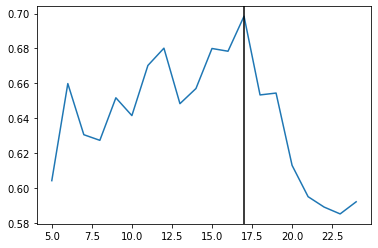

In [28]:
plt.plot(range_clusters ,scores)
plt.axvline(best_model.n_clusters ,color = 'black')
print("best number of cluster elements :" ,best_model.n_clusters)
plt.show()

In [31]:
cluster_labels = ["skills_group_" + str(label) for label in best_model.labels_]

In [32]:
cluster_labels

['skills_group_12',
 'skills_group_5',
 'skills_group_12',
 'skills_group_0',
 'skills_group_12',
 'skills_group_14',
 'skills_group_1',
 'skills_group_10',
 'skills_group_6',
 'skills_group_9',
 'skills_group_10',
 'skills_group_6',
 'skills_group_9',
 'skills_group_16',
 'skills_group_2',
 'skills_group_5',
 'skills_group_5',
 'skills_group_7',
 'skills_group_11',
 'skills_group_6',
 'skills_group_10',
 'skills_group_3',
 'skills_group_16',
 'skills_group_8',
 'skills_group_0',
 'skills_group_3',
 'skills_group_3',
 'skills_group_1',
 'skills_group_1',
 'skills_group_14',
 'skills_group_9',
 'skills_group_2',
 'skills_group_0',
 'skills_group_4',
 'skills_group_2',
 'skills_group_9',
 'skills_group_1',
 'skills_group_1',
 'skills_group_2',
 'skills_group_0',
 'skills_group_0',
 'skills_group_8',
 'skills_group_8',
 'skills_group_5',
 'skills_group_2',
 'skills_group_4',
 'skills_group_5',
 'skills_group_4',
 'skills_group_2',
 'skills_group_4',
 'skills_group_11',
 'skills_group_9',


In [33]:
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.droplevel(0).index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

In [42]:
cluster_labels

['skills_group_12',
 'skills_group_5',
 'skills_group_12',
 'skills_group_0',
 'skills_group_12',
 'skills_group_14',
 'skills_group_1',
 'skills_group_10',
 'skills_group_6',
 'skills_group_9',
 'skills_group_10',
 'skills_group_6',
 'skills_group_9',
 'skills_group_16',
 'skills_group_2',
 'skills_group_5',
 'skills_group_5',
 'skills_group_7',
 'skills_group_11',
 'skills_group_6',
 'skills_group_10',
 'skills_group_3',
 'skills_group_16',
 'skills_group_8',
 'skills_group_0',
 'skills_group_3',
 'skills_group_3',
 'skills_group_1',
 'skills_group_1',
 'skills_group_14',
 'skills_group_9',
 'skills_group_2',
 'skills_group_0',
 'skills_group_4',
 'skills_group_2',
 'skills_group_9',
 'skills_group_1',
 'skills_group_1',
 'skills_group_2',
 'skills_group_0',
 'skills_group_0',
 'skills_group_8',
 'skills_group_8',
 'skills_group_5',
 'skills_group_2',
 'skills_group_4',
 'skills_group_5',
 'skills_group_4',
 'skills_group_2',
 'skills_group_4',
 'skills_group_11',
 'skills_group_9',


In [50]:
skills_cluster = tsne_projection.index.droplevel(0).to_series().groupby(cluster_labels).apply(list)

In [52]:
skills_cluster.shape

(17,)

In [54]:
for index ,skills in skills_cluster.items() :
    print(index)
    print(skills)
    print("################################")

skills_group_0
['C#', 'VBA', 'Microsoft SQL Server', 'ASP.NET', 'ASP.NET Core', '.NET', '.NET Core', 'Xamarin']
################################
skills_group_1
['Go', 'DynamoDB', 'Elasticsearch', 'PostgreSQL', 'Redis', 'Ansible', 'Teraform']
################################
skills_group_10
['HTML/CSS', 'JavaScript', 'SQL', 'jQuery']
################################
skills_group_11
['Ruby', 'Ruby on Rails']
################################
skills_group_12
['Assembly', 'C', 'C++']
################################
skills_group_13
['Unity 3D', 'Unreal Engine']
################################
skills_group_14
['Dart', 'Firebase', 'Flutter']
################################
skills_group_15
['Chef', 'Puppet']
################################
skills_group_16
['Objective-C', 'Swift']
################################
skills_group_2
['PHP', 'MariaDB', 'MySQL', 'SQLite', 'Drupal', 'Laravel', 'Symfony', 'Vue.js']
################################
skills_group_3
['Scala', 'Cassandra', 'Couchbase', 'A

In [57]:
skills_ohe.droplevel(0 ,axis = 1)

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Node.js,Pandas,Puppet,React Native,TensorFlow,Teraform,Torch/PyTorch,Unity 3D,Unreal Engine,Xamarin
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
64458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64459,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
skills_df = []
for index ,skills in skills_cluster.items() :
    feature = skills_ohe.droplevel(0 ,axis = 1)[skills].sum(axis = 1)
    feature.name = index
    skills_df.append(feature)
df_clustered = pd.concat(skills_df ,axis = 1)    

In [61]:
df_clustered

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_2,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
0,6,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,2,2,0,0,0,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64457,3,5,3,1,3,0,2,0,2,4,3,1,3,3,1,1,4
64458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64459,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Illustration Model

In [62]:
class_weights = (1 / ohe_df['DevType'].sum(axis=0))
sample_weight = np.multiply(class_weights.values, 
                            ohe_df['DevType'].values).mean(axis=1)


# Compute samples weight to deal with classes imbalance

In [63]:
combined_features_df = pd.concat([df_clustered, 
                                  skills_ohe.droplevel(0,axis=1)], 
                                 axis=1)
roles_df = ohe_df['DevType'].copy()

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(combined_features_df, roles_df, test_size=0.3, random_state=0)

In [67]:
def f1_from_confusion_matrix(confusion_matrix):
    return (confusion_matrix[1,1] / 
            (confusion_matrix[1,1] + 
             (0.5 * (confusion_matrix[0,1] + confusion_matrix[1,0]))
            ))

In [69]:
feature_sets = {'original': skills_ohe.droplevel(0,axis=1).columns.tolist(), 
                'clusters': df_clustered.columns.tolist()}

In [70]:
# Assign class weight as an inverse of its frequency 
class_weights = (1 / roles_df.sum(axis=0))

# Multiply class weights with the 1 hot encoded values and get the mean of each sample
sample_weight = np.multiply(class_weights.values, Y_train.values).sum(axis=1)

In [79]:
results = {}
for feature_set_name , feature_set in feature_sets.items() :
    # Create sub training data
    sub_train = X_train[feature_set]
    sub_test = X_test[feature_set]

    # train classifier
    clf = MultiOutputClassifier(LogisticRegression())
    clf.fit(sub_train ,Y_train ,sample_weight = sample_weight)
    
    # Calculating F1-score for training data
    conf_train = multilabel_confusion_matrix(Y_train ,clf.predict(sub_train))
    F1_train = [f1_from_confusion_matrix(matrix) for matrix in conf_train]

    # Calculating F1-scores for testing data
    conf_test = multilabel_confusion_matrix(Y_test ,clf.predict(sub_test))
    F1_test = [f1_from_confusion_matrix(matrix) for matrix in conf_test]

    # Add to results
    set_result = pd.DataFrame({"train": F1_train, "test":F1_test}, 
                              index=roles_df.columns.to_list())
    results[feature_set_name] = set_result.sort_values('test')

    # Print
    print("Feature set: " + feature_set_name)
    print(".. Mean train F1:", np.mean(F1_train))    
    print(".. Mean test F1:", np.mean(F1_test))
    print()      


Feature set: original
.. Mean train F1: 0.13532633208643802
.. Mean test F1: 0.13646976895315743

Feature set: clusters
.. Mean train F1: 0.17498249556280707
.. Mean test F1: 0.17841138027655776



In [81]:
features_path = os.path.join(EXPORT_FEATURES_DIR, "features_skills_clusters_counts.pkl")
df_clustered.to_pickle(features_path)

In [83]:
description_path = os.path.join(EXPORT_FEATURES_DIR, "features_skills_clusters_description.yaml")
with open(description_path, 'w') as outfile:
    yaml.dump(skills_cluster.to_dict(), outfile)